In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Add other clustering algorithm libraries as needed


In [4]:
# Load Iris dataset
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(iris_url, header=None, names=column_names)

# Display the first few rows of the dataset
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)


In [6]:
df['KMeans_Labels'] = kmeans.fit_predict(df.drop('class', axis=1))
df['Agg_Labels'] = agglomerative.fit_predict(df.drop('class', axis=1))
df['DBSCAN_Labels'] = dbscan.fit_predict(df.drop('class', axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# Evaluation
# Silhouette Score
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score
silhouette_kmeans = silhouette_score(df.drop('class', axis=1), df['KMeans_Labels'])
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")


Silhouette Score (KMeans): 0.6694929699818938


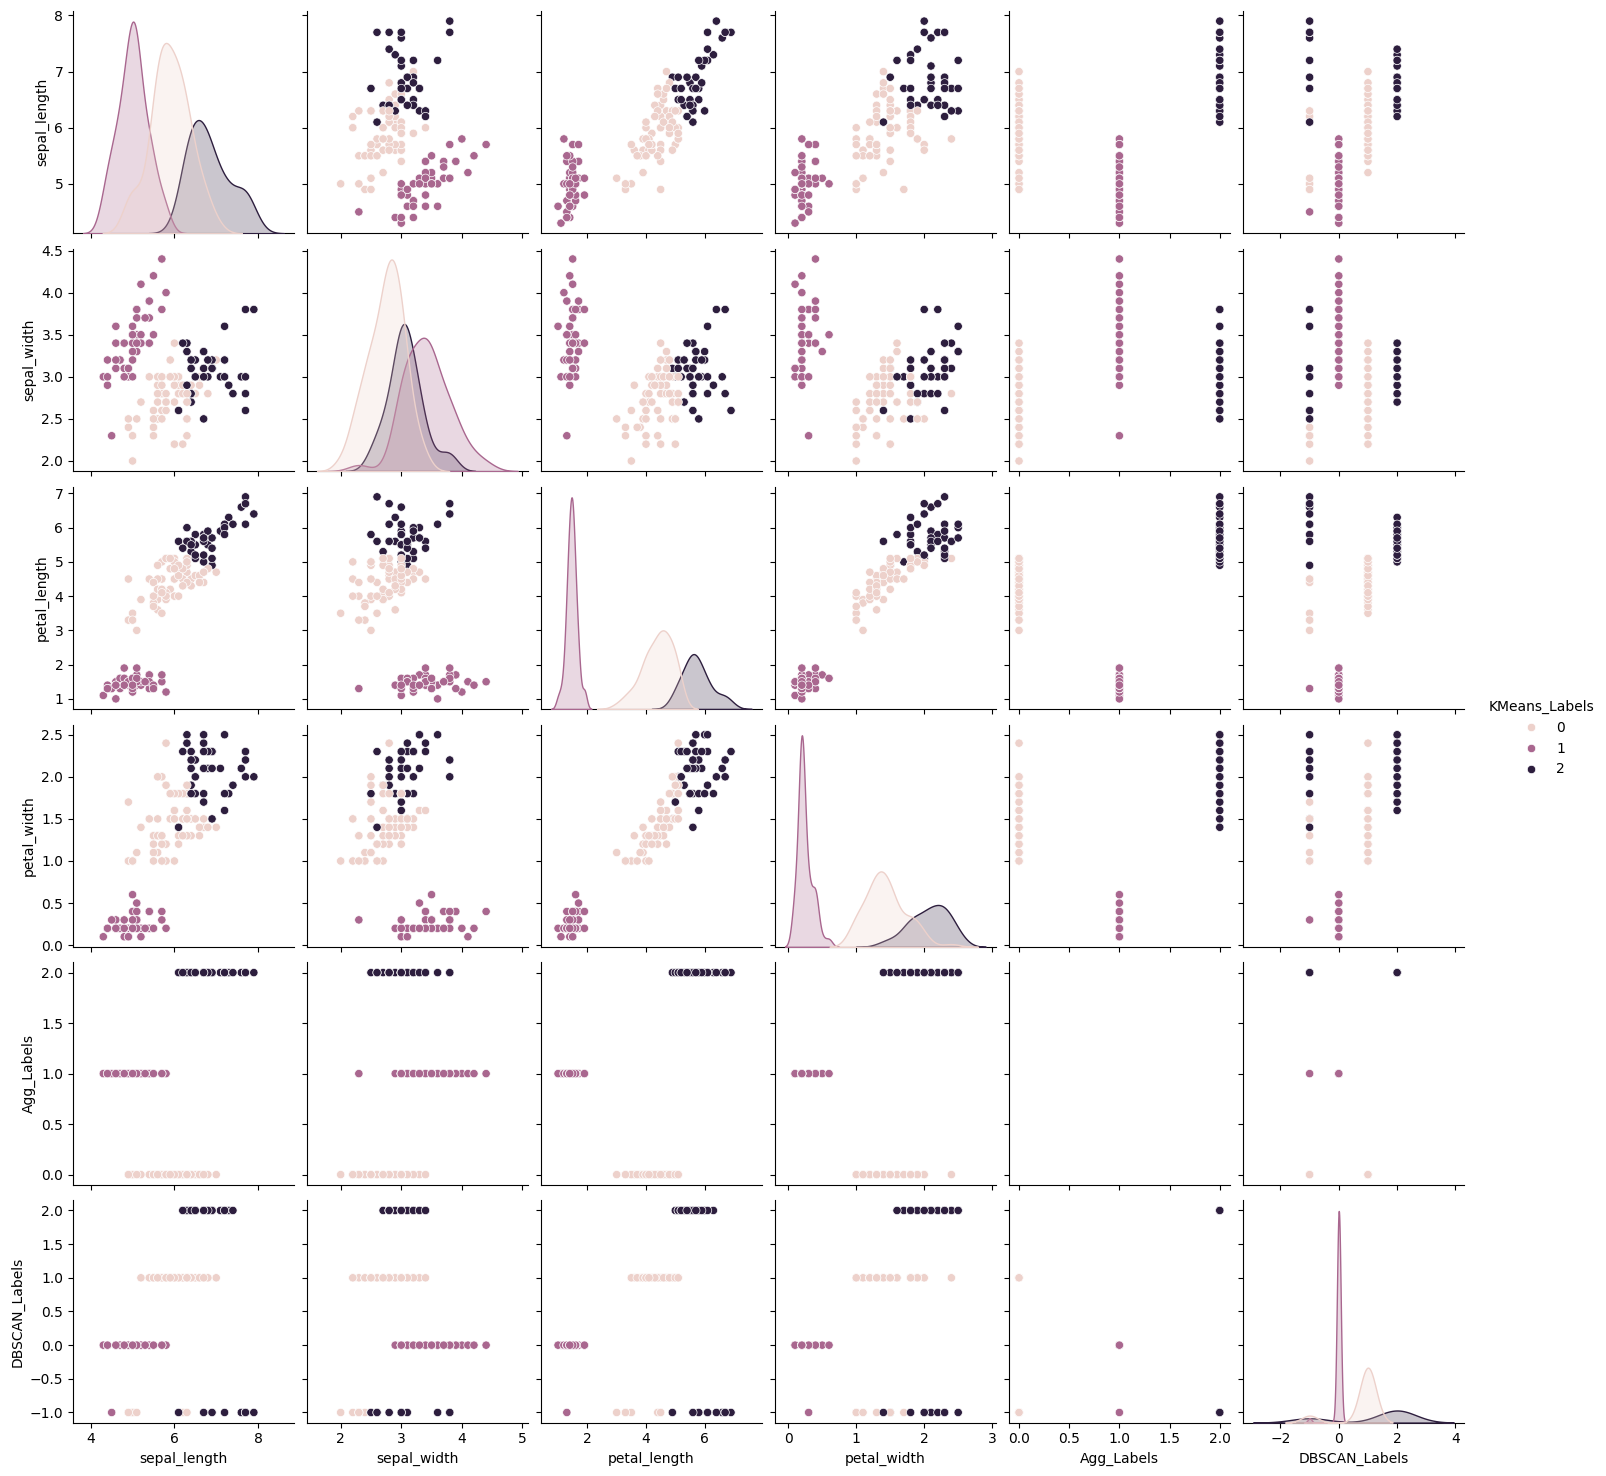

In [9]:
# Visualizations
# Pairplot to visualize clusters
sns.pairplot(df, hue='KMeans_Labels', diag_kind='kde')
plt.show()